 Código para resolver um problema simples de transmissão de calor, unidimensional, pelo método dos elementos fintos (problema do livro do Fish & Belytschko). Importamos as bibliotecas de algebra matricial e de gráficos


 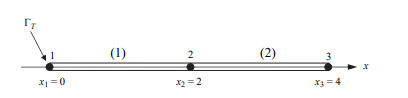



In [1]:
import numpy as np
import matplotlib.pyplot as plt


Parâmetros do cálculo: comprimento total da barra,
área da seção transversal, constante elástica, comprimento dos elementos, módulo de Young. A dimensão do problema é igual ao número de nós. Exemplo 2 elementos lineares, 3 nós. 4 elementos lineares, 5 nós

In [73]:
#Quantidade de nós. deve ser modificado pelo usuário
nos=10
#Comprimento total da barra
comp=4
#Seção transversal
A=0.1
#Condutividade térmica
k=2
#Temperatura fixa no primeiro nó (extremo esquerdo engastado)
T0=0
#Fluxo de calor no último nó (extremo direito)
q=5
#Fonte interna de calor
s=5


#A partir daqui, nada deve ser modidificado.Estrutura 1D - elementos = nos -1
elem=nos-1
#Tamanho dos elementos
l=comp/(elem)
#Condutividade térmica dos elementos
k1=A*k/l
print(elem, l, k1)

9 0.4444444444444444 0.45000000000000007


Se quiséssemos escrever a matriz manualmente, no caso de dim=3, seria assim

In [74]:
#K=np.array([[0.1,-0.1,0], [-0.1,0.2,-0.1], [0.0,-0.1,0.1]])
#print(K)

Automatizando Matriz Rigidez. Método direto

In [75]:
K1=np.identity(nos,float)

for i in range(nos) :
  for j in range (nos) :
    if (i==j and (i==0 or i==(nos-1))) :
      K1[i,j]=k1
    elif abs(i-j)==1 :
      K1[i,j]=-k1
    elif (i==j and (i!=0 or i!=(nos-1)) ) :
      K1[i,j]=2*k1

print(K1)

[[ 0.45 -0.45  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.45  0.9  -0.45  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.45  0.9  -0.45  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.45  0.9  -0.45  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.45  0.9  -0.45  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.45  0.9  -0.45  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.45  0.9  -0.45  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.45  0.9  -0.45  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.45  0.9  -0.45]
 [ 0.    0.    0.    0.    0.    0.    0.    0.   -0.45  0.45]]


O determinante nulo indica que as condições de contorno do problema não foram definidas

In [76]:
det=np.linalg.det(K1)
print(det)
u,v=np.linalg.eig(K1)
print("Autovalores",u),
print("Autovetores",v)

0.0
Autovalores [1.75595086e+00 1.62811529e+00 1.42900673e+00 1.17811529e+00
 9.00000000e-01 6.21884705e-01 3.70993273e-01 2.79830827e-17
 4.40491353e-02 1.71884705e-01]
Autovetores [[-6.99596196e-02 -1.38196601e-01 -2.03030724e-01  2.62865556e-01
  -3.16227766e-01  3.61803399e-01  3.98470231e-01  3.16227766e-01
   4.41707654e-01  4.25325404e-01]
 [ 2.03030724e-01  3.61803399e-01  4.41707654e-01 -4.25325404e-01
   3.16227766e-01 -1.38196601e-01  6.99596196e-02  3.16227766e-01
   3.98470231e-01  2.62865556e-01]
 [-3.16227766e-01 -4.47213595e-01 -3.16227766e-01  7.27267097e-16
   3.16227766e-01 -4.47213595e-01 -3.16227766e-01  3.16227766e-01
   3.16227766e-01 -2.43403291e-16]
 [ 3.98470231e-01  3.61803399e-01 -6.99596196e-02  4.25325404e-01
  -3.16227766e-01 -1.38196601e-01 -4.41707654e-01  3.16227766e-01
   2.03030724e-01 -2.62865556e-01]
 [-4.41707654e-01 -1.38196601e-01  3.98470231e-01 -2.62865556e-01
  -3.16227766e-01  3.61803399e-01 -2.03030724e-01  3.16227766e-01
   6.99596196e-02 

Se invertermmos a matriz singular, teremos uma mensagem de erro

In [77]:
#M=np.linalg.inv(K1)
#print(M)

Impondo BC. No caso, apenas o nó 1 está engastado.  Cortamos a linha 1 e a coluna 1 da matriz K1, pois o primeiro nó está fixo (engastado). Note que agora o determinante da submatriz livre não é mais nulo e ela é invesível




In [78]:
S=np.identity(nos-1,float)
for i in range(nos-1) :
  for j in range(nos-1) :
    S[i,j]=K1[i+1,j+1]

print(S)
det2=np.linalg.det(S)
print(det2)

[[ 0.9  -0.45  0.    0.    0.    0.    0.    0.    0.  ]
 [-0.45  0.9  -0.45  0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.45  0.9  -0.45  0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.45  0.9  -0.45  0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.45  0.9  -0.45  0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.45  0.9  -0.45  0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.45  0.9  -0.45  0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.45  0.9  -0.45]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.45  0.45]]
0.0007566806425781292


In [79]:
INV=np.linalg.inv(S)
print(INV)
print(np.linalg.det(INV))

[[ 2.22222222  2.22222222  2.22222222  2.22222222  2.22222222  2.22222222
   2.22222222  2.22222222  2.22222222]
 [ 2.22222222  4.44444444  4.44444444  4.44444444  4.44444444  4.44444444
   4.44444444  4.44444444  4.44444444]
 [ 2.22222222  4.44444444  6.66666667  6.66666667  6.66666667  6.66666667
   6.66666667  6.66666667  6.66666667]
 [ 2.22222222  4.44444444  6.66666667  8.88888889  8.88888889  8.88888889
   8.88888889  8.88888889  8.88888889]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 11.11111111
  11.11111111 11.11111111 11.11111111]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 13.33333333
  13.33333333 13.33333333 13.33333333]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 13.33333333
  15.55555556 15.55555556 15.55555556]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 13.33333333
  15.55555556 17.77777778 17.77777778]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 13.33333333
  15.55555556 17.77777

Apenas para verificação. O produto de uma matriz pela sua inversa deve dar a matriz identidade (números em potências 1o^(-16 são numericamente zero)

In [80]:
I=INV@S
print(I)

[[ 1.00000000e+00  1.85037171e-16 -1.92438658e-16 -1.48029737e-17
   1.40628250e-16 -6.36527867e-16  1.18423789e-16  1.85037171e-16
  -4.07081776e-16]
 [ 5.92118946e-17  1.00000000e+00 -3.84877315e-16 -2.96059473e-17
   2.81256500e-16 -1.27305573e-15  2.36847579e-16  3.70074342e-16
  -8.14163551e-16]
 [-7.40148683e-17  2.22044605e-16  1.00000000e+00 -8.88178420e-17
  -2.22044605e-16 -7.10542736e-16  5.32907052e-16  3.99680289e-16
  -1.28785871e-15]
 [ 1.48029737e-17 -3.99680289e-16  4.73695157e-16  1.00000000e+00
   1.18423789e-16 -8.58572472e-16 -5.92118946e-17  6.51330841e-16
  -1.53950926e-15]
 [-7.40148683e-17 -8.88178420e-17  2.96059473e-16 -1.00660221e-15
   1.00000000e+00 -5.62512999e-16 -6.51330841e-16  5.92118946e-17
  -1.83556873e-15]
 [ 1.48029737e-17 -2.66453526e-16  9.17784367e-16 -2.16123415e-15
   1.24344979e-15  1.00000000e+00 -7.99360578e-16  7.99360578e-16
  -1.68753900e-15]
 [-2.96059473e-17  4.44089210e-17 -5.03301104e-16 -5.62512999e-16
   1.86517468e-15 -2.5461114

Source é a matriz coluna dos termos de fonte interna de calor, no exemplo s=5 W/m mas pode ser mudado acima. A matriz de força de corpo para cada elemento será dada pelo produto do interpolador de lagrange por esta matriz



In [81]:
#Source=np.array([s,s])
#Fce=l/6*np.array([[2,1],[1,2]])@Source.T
#print(Fce)

Escrevemos as Matrizes de força de corpo, de superfície e total usando matrizes expandidas ao invés de matrizes de junção

In [82]:
Fc=np.zeros(nos)
for i in range(nos):
    if i==0 or i==nos-1 :
      Fc[i]=l*s/2
      print("Ciclo", i)
    else :
      Fc[i]=l*s

Fs=np.zeros(nos)
if  i==nos-1 :
  Fs[i]=-0.5
else :
  Fs[i]=0

F=Fc+Fs
print(Fc,Fs,F)

Ciclo 0
Ciclo 9
[1.11111111 2.22222222 2.22222222 2.22222222 2.22222222 2.22222222
 2.22222222 2.22222222 2.22222222 1.11111111] [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5] [1.11111111 2.22222222 2.22222222 2.22222222 2.22222222 2.22222222
 2.22222222 2.22222222 2.22222222 0.61111111]


Cortamos os termos associados aos nós engastados (no caso, apenas o primeiro)

In [83]:
FL=np.ones(nos-1)
#array1d=np.ones(3)
#print(array1d)

for i in range(nos-1) :
  FL[i]=F[i+1]

print(FL)

[2.22222222 2.22222222 2.22222222 2.22222222 2.22222222 2.22222222
 2.22222222 2.22222222 0.61111111]


Multiplicando a inversa da submatriz de rigidez livre, com a matriz de força livre, obtemos os valores da temperatura nos 4 nós livres. A temperatura no nó engastado é dada: zero grau Celsius.

In [84]:
T=INV@FL
print(T)

[ 40.86419753  76.79012346 107.77777778 133.82716049 154.9382716
 171.11111111 182.34567901 188.64197531 190.        ]


Para fazer o gráfico, determinamos os pontos das coordenadas dos nós. No caso de dim=5 são 0, 1, 2, 3, e 4  

In [85]:
x1=np.linspace(0,comp,nos)
print(x1)

[0.         0.44444444 0.88888889 1.33333333 1.77777778 2.22222222
 2.66666667 3.11111111 3.55555556 4.        ]


Agora escrevemos a matriz de valores de temperatura, juntando os resultados calculados com o valor prescrito do nó engastado, x=0, T1=0

In [86]:
Tc=np.ones(nos)

for i in range(nos) :
  if i==0 :
     Tc[i]=0.0
  else  :
     Tc[i]=T[i-1]

print(Tc)

[  0.          40.86419753  76.79012346 107.77777778 133.82716049
 154.9382716  171.11111111 182.34567901 188.64197531 190.        ]


Fazemos o gráfico, sobrepondo a solução exata do problema (quadrática) com os resultados que obtivemos

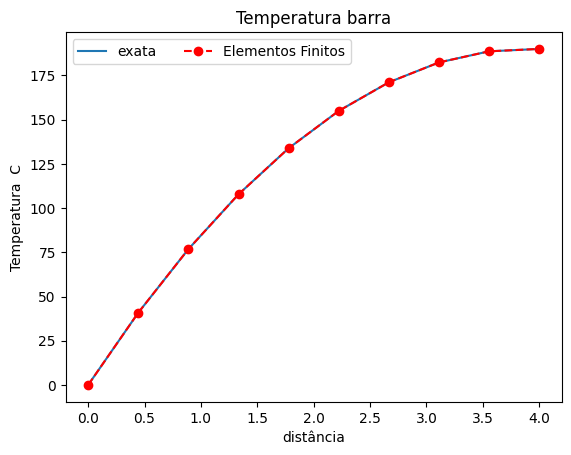

In [88]:
#Tex=-12.5*x**2+97.5*x
x=np.linspace(0,comp,nos)
plt.plot(x,-12.5*x**2+97.5*x,label="exata"),
plt.plot(x1,Tc,"o--r",label="Elementos Finitos")
plt.xlabel("distância")
plt.ylabel("Temperatura  C")
plt.title("Temperatura barra")
plt.legend(loc='upper left', fontsize=10, ncol=2)
plt.show()